<a href="https://colab.research.google.com/github/misrapk/Deep-Learning-Course-YT/blob/main/01Neural_Network_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of Neurl network

- ML = Scikit Learn
- DL = tensorflow and Keras

In [ ]:
#load dataset
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
fashion_mnist

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
(X_train_f, y_train_f),( X_test, y_test) = fashion_mnist

In [ ]:
X_train, y_train = X_train_f[:-5000], y_train_f[:-5000]
X_valid, y_valid = X_train_f[-5000:], y_train_f[-5000:]

In [ ]:
print("Shape of X_train, ", X_train.shape)
print("Shape of y_train, ", y_train.shape)
print("Shape of X_valid, ", X_valid.shape)
print("Shape of y_valid, ", y_valid.shape)

print('Data Type: ', X_train.dtype)


Shape of X_train,  (55000, 28, 28)
Shape of y_train,  (55000,)
Shape of X_valid,  (5000, 28, 28)
Shape of y_valid,  (5000,)
Data Type:  uint8


 - Every image is 28x28 array rather than 1D array of Size 784
 - we will scale the pixel to 0-1 range by dividingn to 255.0

In [ ]:
X_train, X_valid,X_test= X_train/255.0, X_valid/255.0, X_test/255.0

In [ ]:
y_train[5]

np.uint8(2)

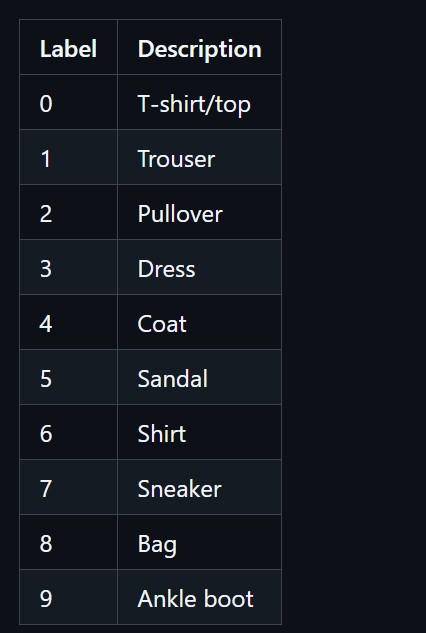

In [ ]:
class_names = ['T-shirt/top','Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker', 'Bag','Ankle Boot']

In [ ]:
y_train[6]

np.uint8(7)

In [ ]:
class_names[y_train[6]]

'Sneaker'

#Create Model using Keras API

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),   #input layer
    tf.keras.layers.Dense(300, activation='relu'),  #hidden layer 1
    tf.keras.layers.Dense(100, activation='relu'),  #hidden layer 2
    tf.keras.layers.Dense(10, activation='softmax')   #output layer

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [ ]:
model.layers[3].name

'dense_2'

In [ ]:
w, b = model.layers[2].get_weights()
b.shape

(100,)

# Compile Our Model

In [ ]:
model.compile(optimizer='sgd',
              loss ='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Trainig and evaluation

In [ ]:
modelTrain = model.fit(X_train, y_train, epochs =40, validation_data= (X_valid, y_valid))
# modelTrain = model.fit(X_train, y_train, epochs =40, validation_split = 0.1)


Epoch 1/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6687 - loss: 1.0268 - val_accuracy: 0.8278 - val_loss: 0.5105
Epoch 2/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8238 - loss: 0.5097 - val_accuracy: 0.8332 - val_loss: 0.4640
Epoch 3/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8426 - loss: 0.4565 - val_accuracy: 0.8434 - val_loss: 0.4402
Epoch 4/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8526 - loss: 0.4256 - val_accuracy: 0.8454 - val_loss: 0.4236
Epoch 5/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8600 - loss: 0.4036 - val_accuracy: 0.8498 - val_loss: 0.4101
Epoch 6/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8646 - loss: 0.3860 - val_accuracy: 0.8560 - val_loss: 0.3996
Epoch 7/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8683 - loss: 0.3712 - val_accuracy: 0.8582 - val_loss: 0.3905
Epoch 8/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8733 - loss: 0.3583 - 

In [ ]:
modelTrain.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39]

In [ ]:
modelTrain.params

{'verbose': 'auto', 'epochs': 40, 'steps': 1719}

In [ ]:
modelTrain.history

{'accuracy': [0.7600181698799133,
  0.8290727138519287,
  0.8446000218391418,
  0.8538545370101929,
  0.8606908917427063,
  0.8655454516410828,
  0.8696727156639099,
  0.8742181658744812,
  0.8771636486053467,
  0.880436360836029,
  0.883436381816864,
  0.8862727284431458,
  0.8888182044029236,
  0.8910909295082092,
  0.8933818340301514,
  0.8955636620521545,
  0.897418200969696,
  0.8996727466583252,
  0.9016000032424927,
  0.9035636186599731,
  0.9048363566398621,
  0.9063454270362854,
  0.9082182049751282,
  0.909709095954895,
  0.9114909172058105,
  0.9130908846855164,
  0.9147272706031799,
  0.9162363409996033,
  0.9179818034172058,
  0.9189817905426025,
  0.9205090999603271,
  0.9219090938568115,
  0.9233636260032654,
  0.9246363639831543,
  0.9259091019630432,
  0.9276363849639893,
  0.9288363456726074,
  0.9301818013191223,
  0.9317454695701599,
  0.9327272772789001],
 'loss': [0.7266812324523926,
  0.49034684896469116,
  0.4451220631599426,
  0.41711586713790894,
  0.396651655

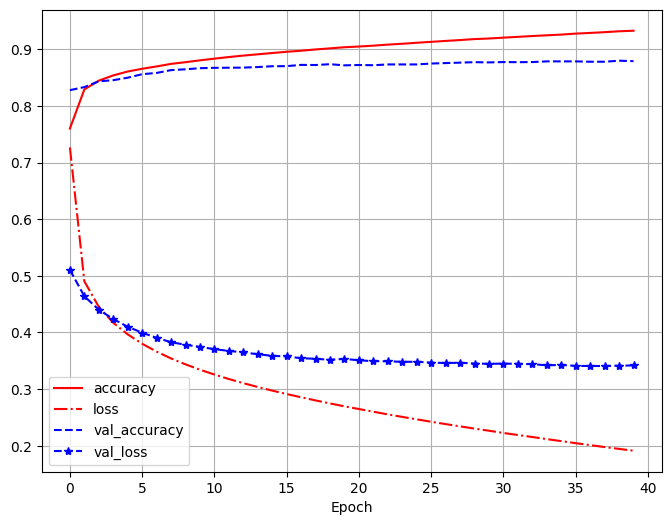

In [ ]:
# plot the accuracy and loss
import matplotlib.pyplot as plt
import pandas as pd


pd.DataFrame(modelTrain.history).plot(figsize=(8,6),grid = True, xlabel="Epoch",
                                      style = ['r-', 'r-.', 'b--', 'b--*'])
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8770 - loss: 0.3531


[0.3489782512187958, 0.8784000277519226]

# Prediction

In [ ]:
X_new = X_test[:4]

In [ ]:
y_probab = model.predict(X_new).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [ ]:
import numpy as np

y_pred = y_probab.argmax(axis = -1)
y_pred

array([9, 2, 1, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser', 'Trouser'], dtype='<U11')